# Introduction to Convolutional Neural Networks (CNNs)
**Author:** Dr. Rishikesh Yadav / Vedant Vibhor

This notebook demonstrates fundamental CNN concepts using the MNIST dataset and TensorFlow/Keras.

**Concepts covered:**
- Local receptive fields
- Convolution operations
- Pooling layers
- Feature map visualization
- Basic CNN architecture

## 1. Import Libraries and Load Data
MNIST dataset contains 60,000 28x28 grayscale images of handwritten digits (0-9).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to [0,1] and add channel dimension
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 2. Visualize Sample Data
Visualize class distribution and display first 9 training images with labels.

Training data shape: (60000, 28, 28, 1)


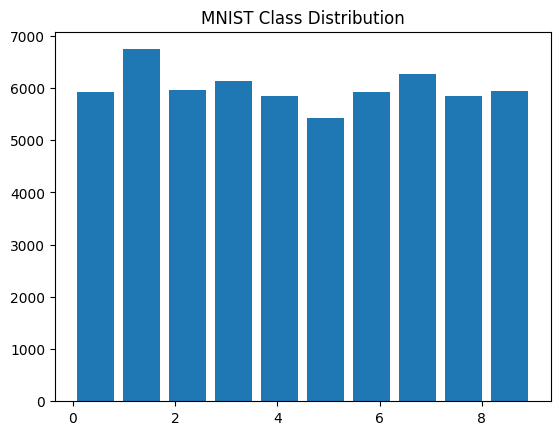

In [2]:
# Print shapes and visualize class distribution
print(f"Training data shape: {train_images.shape}")
plt.hist(np.argmax(train_labels, axis=1), bins=10, rwidth=0.8)
plt.title('MNIST Class Distribution')
plt.show()

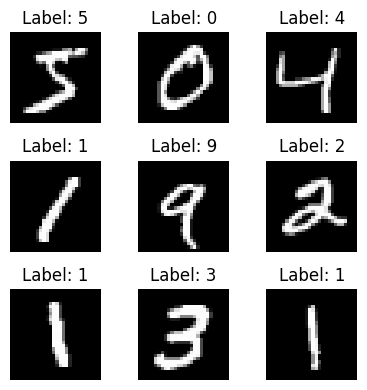

In [3]:
plt.figure(figsize=(4,4))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Build CNN Architecture
Following LeNet-inspired architecture:
- Conv2D -> MaxPooling -> Conv2D -> MaxPooling -> Flatten -> Dense -> Output

In [4]:
# Build a simple CNN model
model = models.Sequential(name='MNIST_CNN')
model.add(layers.Input(shape=(28, 28, 1)))

# First convolutional layer (local receptive fields): 32 filters of size 3x3, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        name='conv1'))
# Max pooling: reduces spatial dimensions by taking max over 2x2 regions
model.add(layers.MaxPooling2D((2, 2), name='pool1'))


# Second convolutional layer: 64 filters for more complex features
model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                        name='conv2'))
# Second max pooling layer
model.add(layers.MaxPooling2D((2, 2), name='pool2'))


# Flatten the feature maps for dense layers
model.add(layers.Flatten(name='flatten'))

# Fully connected layer: 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu', name='dense1'))

# Dropout to prevent overfitting by randomly dropping 50% of units
model.add(layers.Dropout(0.5, name='dropout'))

# Output layer: 10 units for 10 classes with softmax activation
model.add(layers.Dense(10, activation='softmax', name='output'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the Model
Using 10% of training data for validation.

In [5]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7423 - loss: 0.7957 - val_accuracy: 0.9817 - val_loss: 0.0656
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9530 - loss: 0.1598 - val_accuracy: 0.9855 - val_loss: 0.0534
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9677 - loss: 0.1131 - val_accuracy: 0.9862 - val_loss: 0.0459
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9749 - loss: 0.0910 - val_accuracy: 0.9893 - val_loss: 0.0361
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9771 - loss: 0.0774 - val_accuracy: 0.9902 - val_loss: 0.0359
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9812 - loss: 0.0659 - val_accuracy: 0.9917 - val_loss: 0.0323
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9832 - loss: 0.0570 - val_accuracy: 0.9898 - val_loss: 0.0371
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9849 - loss: 0.0488 - val_accu

## 5. Evaluate and Visualize Training

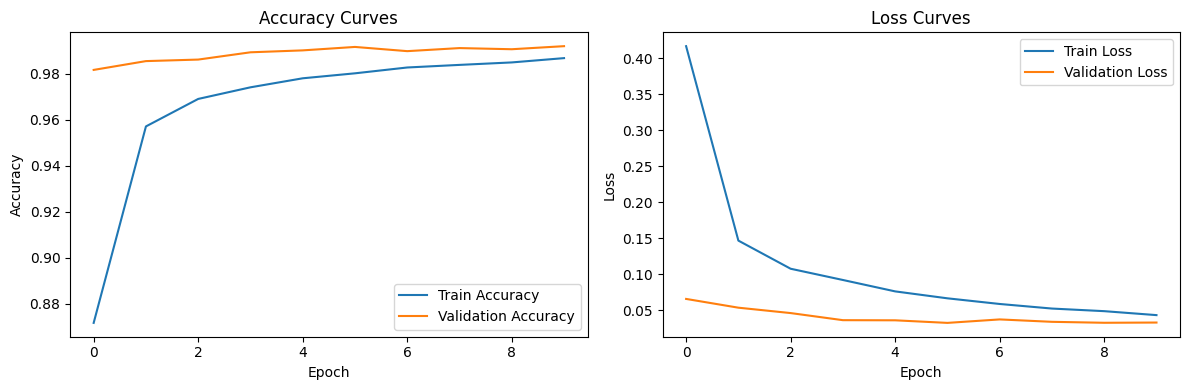

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0347

Test Accuracy: 0.9908


In [6]:
# Plot training and validation accuracy/loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")

## 6. Visualize Learned Filters
Display the convolutional layer filters.

In [8]:
def visualize_filters(model, layer_name, num_filters=8):
    """
    Visualize filters of a convolutional layer in the CNN.
    
    Args:
        model: Keras model containing the convolutional layer.
        layer_name (str): Name of the convolutional layer (e.g., 'conv1').
        num_filters (int): Number of filters to visualize (default: 8).
    """
    # Get the layer by name and extract its weights (filters)
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()
    
    # Normalize filters for better visualization (scale to [0, 1])
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min) if f_max > f_min else filters
    
    # Plot the first num_filters filters
    plt.figure(figsize=(10, 3))
    for i in range(min(num_filters, filters.shape[3])):
        # Extract the i-th filter (assuming 2D filters for grayscale images)
        filter_img = filters[:, :, 0, i]
        plt.subplot(1, num_filters, i + 1)
        plt.imshow(filter_img, cmap='gray')
        plt.title(f'Filter {i + 1}')
        plt.axis('off')
    plt.suptitle(f'Filters from {layer_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()


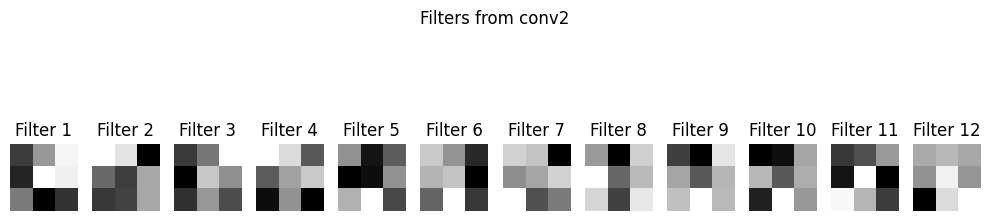

In [9]:
visualize_filters(model, 'conv2', num_filters=12)

## 7. Visualize Feature Maps
Show how input image transforms through layers.

In [10]:
def visualize_feature_maps(model, sample_img, layer_names, num_filters=8):
    """
    Visualize feature maps produced by specified layers for a sample image.
    
    Args:
        model: Keras model containing the layers to visualize.
        sample_img: Input image (numpy array) with shape (1, height, width, channels).
        layer_names (list): List of layer names to visualize (e.g., ['conv1', 'pool1']).
        num_filters (int): Number of feature maps to display per layer (default: 8).
    """
    # Create a submodel to get outputs from specified layers
    layer_outputs = [model.get_layer(name).output for name in layer_names]
    activation_model = models.Model(inputs=model.inputs, outputs=layer_outputs)
    
    # Get feature maps for the sample image
    activations = activation_model.predict(sample_img, verbose=0)
    
    # Visualize feature maps for each layer
    for layer_name, activation in zip(layer_names, activations):
        plt.figure(figsize=(15, 3))
        
        # Plot the input image
        plt.subplot(1, num_filters + 1, 1)
        plt.imshow(sample_img.reshape(28, 28), cmap='gray')
        plt.title('Input Image')
        plt.axis('off')
        
        # Plot the first num_filters feature maps
        for i in range(min(num_filters, activation.shape[3])):
            plt.subplot(1, num_filters + 1, i + 2)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.title(f'F{i + 1}')
            plt.axis('off')
        plt.suptitle(f'Feature Maps ({layer_name})')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

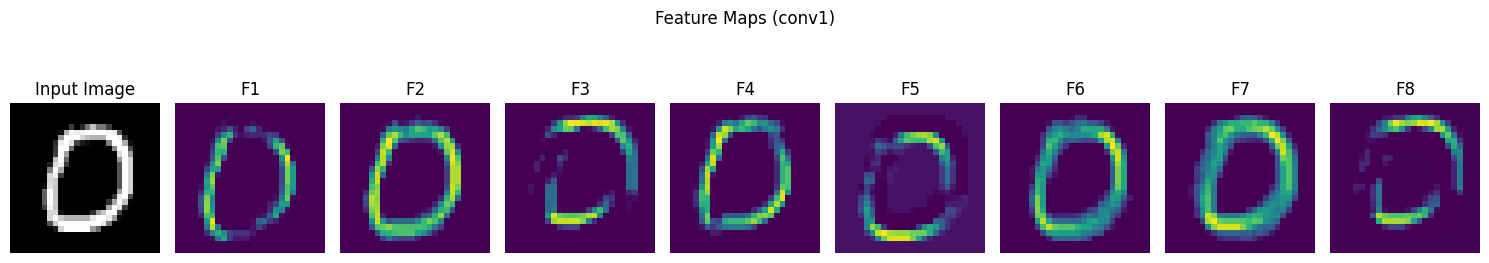

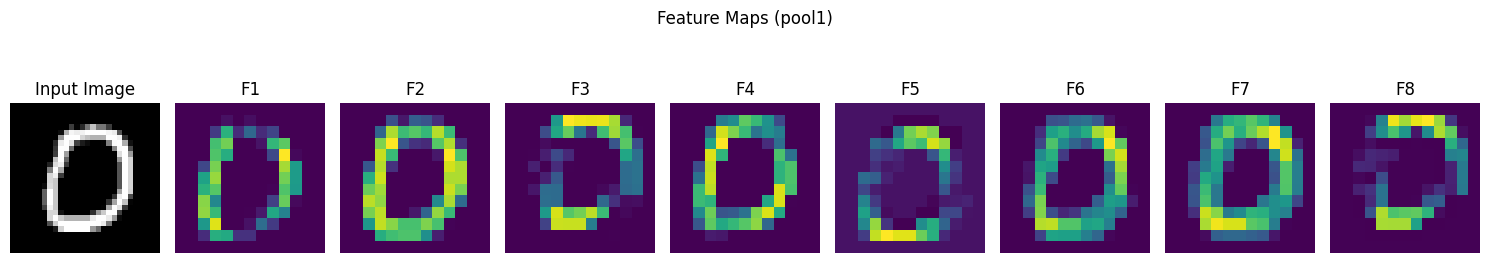

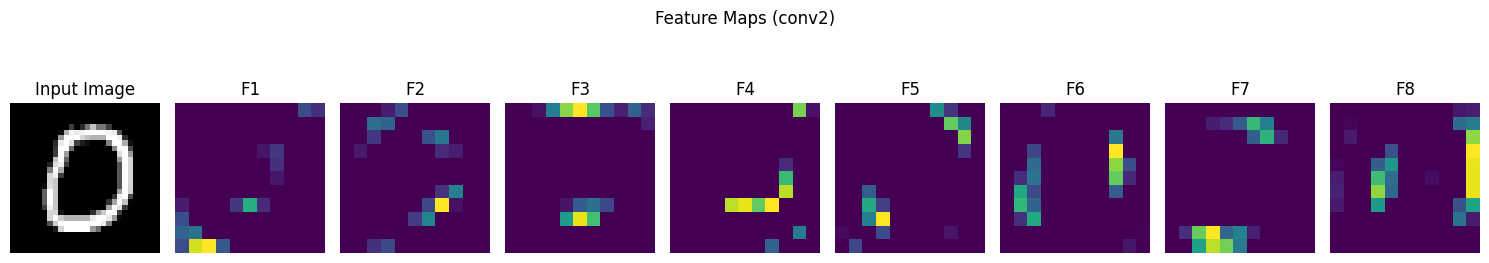

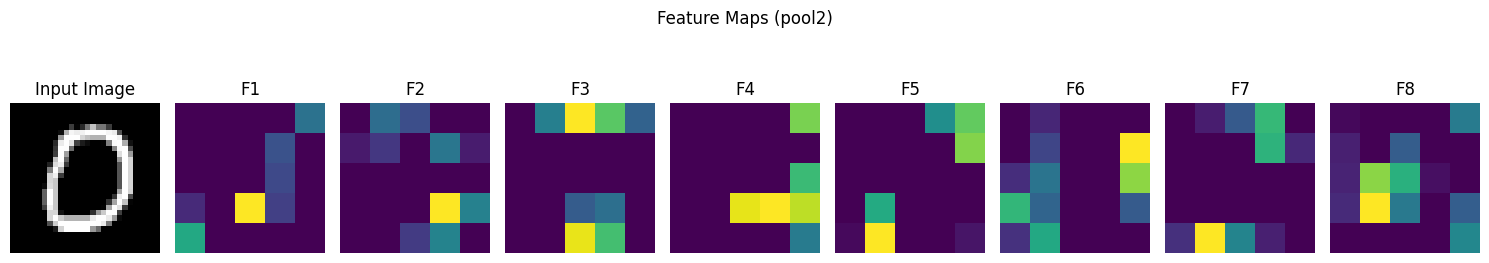

In [11]:
sample_img = test_images[10:11]
visualize_feature_maps(model, sample_img, ['conv1', 'pool1','conv2', 'pool2'])

## Conclusion

In this notebook, we introduced Convolutional Neural Networks (CNNs) using TensorFlow/Keras and the MNIST dataset. We covered basic CNN building blocks, training, evaluation, and visualized both filters and feature maps. This forms the foundation for deeper study of CNNs in computer vision.